<a href="https://colab.research.google.com/github/DataLovecraft/DS-Unit-2-Regression-Classification/blob/master/module3/JM_assignment_regression_classification_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 3

## Assignment

We're going back to our other **New York City** real estate dataset. Instead of predicting apartment rents, you'll predict property sales prices.

But not just for condos in Tribeca...

Instead, predict property sales prices for **One Family Dwellings** (`BUILDING_CLASS_CATEGORY` == `'01 ONE FAMILY DWELLINGS'`) using a subset of the data where the **sale price was more than \\$100 thousand and less than $2 million.** 

The [NYC Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) has a glossary of property sales terms and NYC Building Class Code Descriptions. The data comes from the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.


- [X] Do train/test split. Use data from January — March 2019 to train. Use data from April 2019 to test.
- [X] Do exploratory visualizations with Seaborn.
- [X] Do one-hot encoding of categorical features.
- [ ] Do feature selection with `SelectKBest`.
- [ ] Fit a linear regression model with multiple features.
- [ ] Get mean absolute error for the test set.
- [ ] As always, commit your notebook to your fork of the GitHub repo.


## Stretch Goals
- [ ] Add your own stretch goal(s) !
- [ ] Try [`RidgeCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) instead of Linear Regression, especially if your errors blow up! Watch [Aaron Gallant's 9 minute video on Ridge Regression](https://www.youtube.com/watch?v=XK5jkedy17w) to learn more.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Learn more about feature selection:
    - ["Permutation importance"](https://www.kaggle.com/dansbecker/permutation-importance)
    - [scikit-learn's User Guide for Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)
    - [mlxtend](http://rasbt.github.io/mlxtend/) library
    - scikit-learn-contrib libraries: [boruta_py](https://github.com/scikit-learn-contrib/boruta_py) & [stability-selection](https://github.com/scikit-learn-contrib/stability-selection)
    - [_Feature Engineering and Selection_](http://www.feat.engineering/) by Kuhn & Johnson.
- [ ] Try [statsmodels](https://www.statsmodels.org/stable/index.html) if you’re interested in more inferential statistical approach to linear regression and feature selection, looking at p values and 95% confidence intervals for the coefficients.
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapters 1-3, for more math & theory, but in an accessible, readable way (without an excessive amount of formulas or academic pre-requisites).
(That book is good regardless of whether your cultural worldview is inferential statistics or predictive machine learning)
- [ ] Read Leo Breiman's paper, ["Statistical Modeling: The Two Cultures"](https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726)
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html):

> Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:

> - **Convenience and encapsulation.** You only have to call fit and predict once on your data to fit a whole sequence of estimators.
> - **Joint parameter selection.** You can grid search over parameters of all estimators in the pipeline at once.
> - **Safety.** Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

In [0]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module3')

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import pandas as pd
import pandas_profiling

# Read New York City property sales data
df = pd.read_csv('../data/NYC_Citywide_Rolling_Calendar_Sales.csv')

# Change column names: replace spaces with underscores
df.columns = [col.replace(' ', '_') for col in df]

# SALE_PRICE was read as strings.
# Remove symbols, convert to integer
df['SALE_PRICE'] = (
    df['SALE_PRICE']
    .str.replace('$','')
    .str.replace('-','')
    .str.replace(',','')
    .astype(int)
)

In [4]:
df

BOROUGH              NEIGHBORHOOD  ... SALE_PRICE   SALE_DATE
0            1                   CHELSEA  ...          0  01/01/2019
1            1                   FASHION  ...          0  01/01/2019
2            1                   FASHION  ...          0  01/01/2019
3            1    GREENWICH VILLAGE-WEST  ...          0  01/01/2019
4            1   UPPER EAST SIDE (59-79)  ...          0  01/01/2019
5            1   UPPER EAST SIDE (79-96)  ...          0  01/01/2019
6            1  UPPER WEST SIDE (96-116)  ...          0  01/01/2019
7            2      MORRIS PARK/VAN NEST  ...          0  01/01/2019
8            2      MORRIS PARK/VAN NEST  ...          0  01/01/2019
9            2      MORRIS PARK/VAN NEST  ...          0  01/01/2019
10           2      MORRIS PARK/VAN NEST  ...          0  01/01/2019
11           2      MORRIS PARK/VAN NEST  ...          0  01/01/2019
12           2      MORRIS PARK/VAN NEST  ...          0  01/01/2019
13           2      MORRIS PARK/VAN NEST  ...          0  01/01/2019
14           2      MORRIS PARK/VAN NEST  ...          0  01/01/2019
15           2      MORRIS PARK/VAN NEST  ...          0  01/01/2019
16           2      MORRIS PARK/VAN NEST  ...          0  01/01/2019
17           2      MORRIS PARK/VAN NEST  ...          0  01/01/2019
18           2      MORRIS PARK/VAN NEST  ...          0  01/01/2019
19           2      PELHAM PARKWAY SOUTH  ...          0  01/01/2019
20           2      PELHAM PARKWAY SOUTH  ...          0  01/01/2019
21           2      PELHAM PARKWAY SOUTH  ...          0  01/01/2019
22           2      PELHAM PARKWAY SOUTH  ...          0  01/01/2019
23           2      PELHAM PARKWAY SOUTH  ...          0  01/01/2019
24           2      PELHAM PARKWAY SOUTH  ...          0  01/01/2019
25           2      PELHAM PARKWAY SOUTH  ...          0  01/01/2019
26           2      PELHAM PARKWAY SOUTH  ...          0  01/01/2019
27           2      PELHAM PARKWAY SOUTH  ...          0  01/01/2019
28           2  SCHUYLERVILLE/PELHAM BAY  ...          0  01/01/2019
29           2               WESTCHESTER  ...          0  01/01/2019
...        ...                       ...  ...        ...         ...
23010        4                  GLENDALE  ...     860000  04/30/2019
23011        4                  GLENDALE  ...     323000  04/30/2019
23012        4                  GLENDALE  ...     265000  04/30/2019
23013        4                    HOLLIS  ...     355000  04/30/2019
23014        4                HOLLISWOOD  ...     210000  04/30/2019
23015        4              HOWARD BEACH  ...     689419  04/30/2019
23016        4              HOWARD BEACH  ...     225000  04/30/2019
23017        4           JACKSON HEIGHTS  ...     300000  04/30/2019
23018        4                   JAMAICA  ...    1350000  04/30/2019
23019        4               KEW GARDENS  ...     430000  04/30/2019
23020        4               KEW GARDENS  ...     560000  04/30/2019
23021        4                 LAURELTON  ...     574850  04/30/2019
23022        4               LITTLE NECK  ...     900000  04/30/2019
23023        4          LONG ISLAND CITY  ...     892500  04/30/2019
23024        4           OAKLAND GARDENS  ...     655000  04/30/2019
23025        4            QUEENS VILLAGE  ...          0  04/30/2019
23026        4                 REGO PARK  ...     800000  04/30/2019
23027        4             RICHMOND HILL  ...          0  04/30/2019
23028        4             RICHMOND HILL  ...     690000  04/30/2019
23029        4                  ROSEDALE  ...     635000  04/30/2019
23030        4             SOUTH JAMAICA  ...     367500  04/30/2019
23031        4          SOUTH OZONE PARK  ...     514000  04/30/2019
23032        4          SOUTH OZONE PARK  ...     635000  04/30/2019
23033        4       SPRINGFIELD GARDENS  ...     545000  04/30/2019
23034        4       SPRINGFIELD GARDENS  ...     875000  04/30/2019
23035        4                ST. ALBANS  ...     510000  04/30/2019
23036

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23040 entries, 0 to 23039
Data columns (total 21 columns):
BOROUGH                           23040 non-null int64
NEIGHBORHOOD                      23040 non-null object
BUILDING_CLASS_CATEGORY           23040 non-null object
TAX_CLASS_AT_PRESENT              23039 non-null object
BLOCK                             23040 non-null int64
LOT                               23040 non-null int64
EASE-MENT                         0 non-null float64
BUILDING_CLASS_AT_PRESENT         23039 non-null object
ADDRESS                           23040 non-null object
APARTMENT_NUMBER                  5201 non-null object
ZIP_CODE                          23039 non-null float64
RESIDENTIAL_UNITS                 23039 non-null float64
COMMERCIAL_UNITS                  23039 non-null float64
TOTAL_UNITS                       23039 non-null float64
LAND_SQUARE_FEET                  22987 non-null object
GROSS_SQUARE_FEET                 23039 non-null float

In [8]:
df.shape

(23040, 21)

In [0]:
# Replace values where the condition is True.

mask = ((df['BUILDING_CLASS_CATEGORY'] == '01 ONE FAMILY DWELLINGS') &
        (df['SALE_PRICE'] > 100000) &
        (df['SALE_PRICE'] < 2000000)) 

df = df[mask]

In [12]:
# Converts arguments to datetime.

df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'], infer_datetime_format = True)
df['SALE_DATE'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count                    3151
unique                     91
top       2019-01-31 00:00:00
freq                       78
first     2019-01-01 00:00:00
last      2019-04-30 00:00:00
Name: SALE_DATE, dtype: object

In [15]:
# Split Data to train/test
# Train = Jan - Mar
# Test = April

train = df[df.SALE_DATE.dt.month < 4]
test = df[df.SALE_DATE.dt.month == 4]

train.shape, test.shape

((2507, 21), (644, 21))

In [16]:
import pandas_profiling

train.profile_report()

/usr/local/lib/python3.6/dist-packages/pandas_profiling/model/correlations.py:124: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The internally computed table of expected frequencies has a zero element at (0, 0).')
  correlation_name=correlation_name, error=error


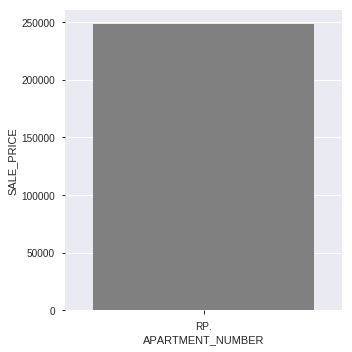

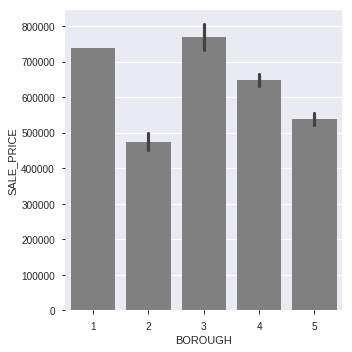

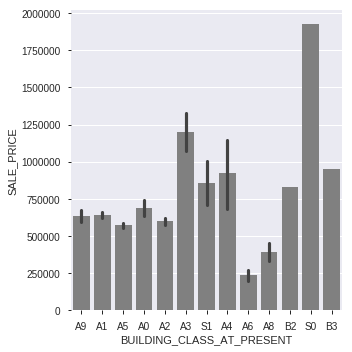

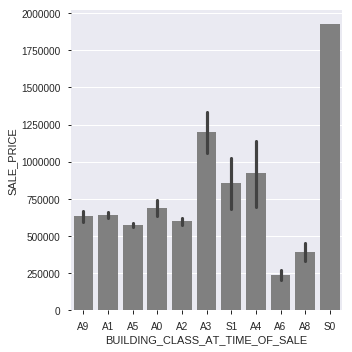

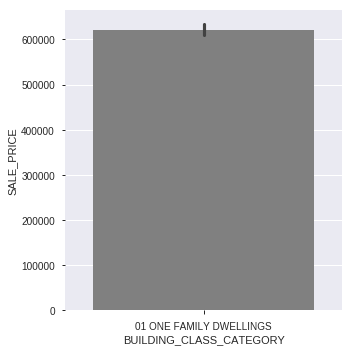

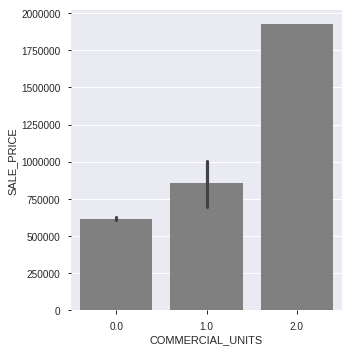

ValueError: ignored

In [21]:
# EDA with Seaborn 

import matplotlib.pyplot as plt
import seaborn as sns

for col in sorted(train.columns):
  if train[col].nunique() <= 20:
    sns.catplot(x = col, y = 'SALE_PRICE', data = train, kind = 'bar', color = 'grey')
    plt.show();
    
# Error = min() arg is an empty sequence. WHY? 

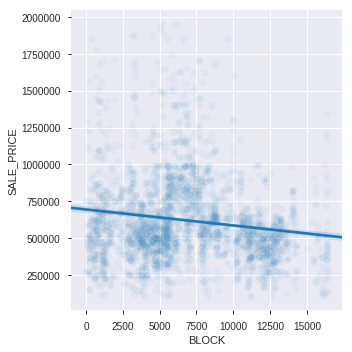

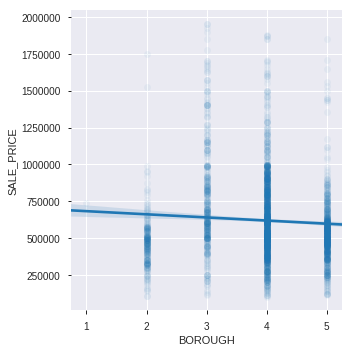

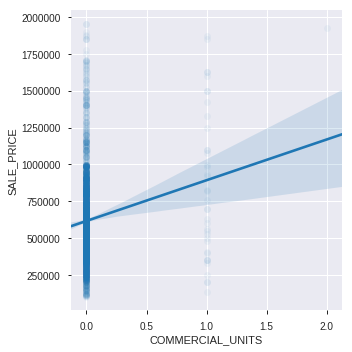

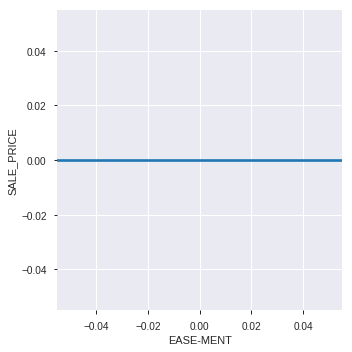

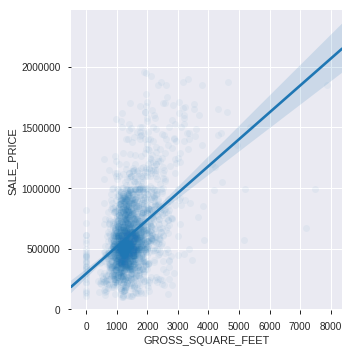

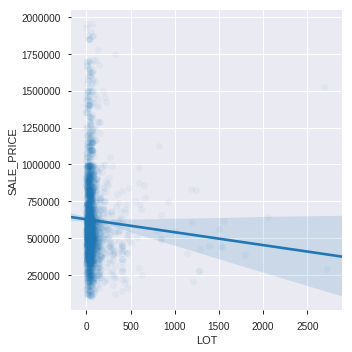

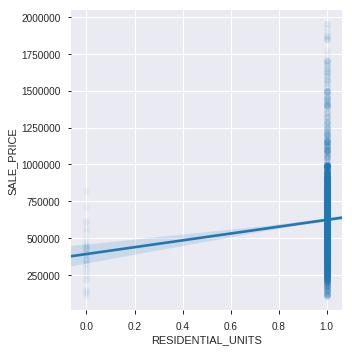

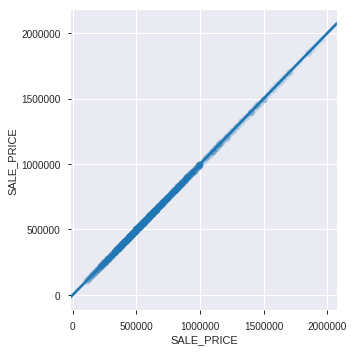

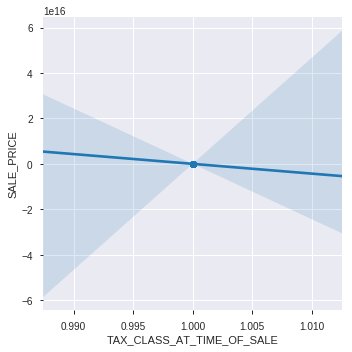

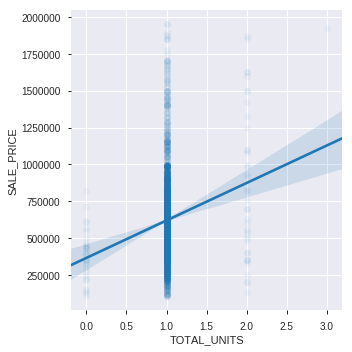

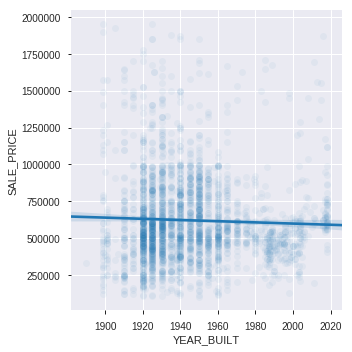

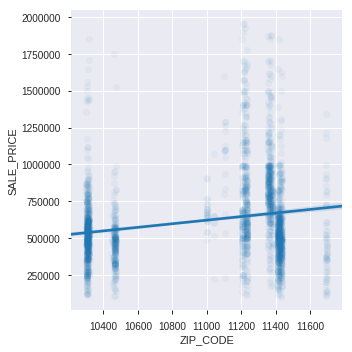

In [22]:
numeric = train.select_dtypes('number')
for col in sorted(numeric.columns):
    sns.lmplot(x=col, y='SALE_PRICE', data=train, scatter_kws=dict(alpha=0.05))
    plt.show()

In [23]:
# One-hot encoding

# Machine learning algorithms cannot work with categorical data directly. Categorical data must be converted to numbers.

# BOROUGH is INT64, should be Categorical(Object)?

train.describe(exclude='number')


NEIGHBORHOOD  ...            SALE_DATE
count             2507  ...                 2507
unique             176  ...                   68
top     FLUSHING-NORTH  ...  2019-01-31 00:00:00
freq                77  ...                   78
first              NaN  ...  2019-01-01 00:00:00
last               NaN  ...  2019-03-30 00:00:00

[6 rows x 9 columns]

In [24]:
train['BOROUGH'].value_counts()

4    1204
5     662
3     398
2     242
1       1
Name: BOROUGH, dtype: int64

In [25]:
# Convert INT64 to String

train['BOROUGH'] = train['BOROUGH'].astype(str)
test['BOROUGH'] = test['BOROUGH'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
# Check cardinality of non-numeric featues. Cardinality means the number of unique values that a feature has 

train.describe(exclude='number').T.sort_values(by='unique')

count  ...                 last
BUILDING_CLASS_CATEGORY         2507  ...                  NaN
APARTMENT_NUMBER                   1  ...                  NaN
TAX_CLASS_AT_PRESENT            2507  ...                  NaN
BOROUGH                         2507  ...                  NaN
BUILDING_CLASS_AT_TIME_OF_SALE  2507  ...                  NaN
BUILDING_CLASS_AT_PRESENT       2507  ...                  NaN
SALE_DATE                       2507  ...  2019-03-30 00:00:00
NEIGHBORHOOD                    2507  ...                  NaN
LAND_SQUARE_FEET                2507  ...                  NaN
ADDRESS                         2507  ...                  NaN

[10 rows x 6 columns]

In [0]:
# Select Features

train_subset = train.select_dtypes('number').dropna(axis = 'columns')
test_subset = test.select_dtypes('number').dropna(axis = 'columns')
assert all(train_subset.columns == test_subset.columns)

In [30]:
target = 'SALE_PRICE'
features = train_subset.columns.drop(target)

X_train = train_subset[features]
y_train = train_subset[target]

X_test = test_subset[features]
y_test = test_subset[target]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2507, 9), (2507,), (644, 9), (644,))

In [47]:
from sklearn.feature_selection import f_regression, SelectKBest


selector = SelectKBest(score_func = f_regression, k = 15)

X_train_selected = selector.fit.transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
X_train_selected.shape, X_test_selected.shape



AttributeError: ignored